## Artificial Intelligence for Trading 
**Contacts: novella@di.uniroma1.it, coletta@di.uniroma1.it, prata@di.uniroma1.it**

### Lab Lecture 2— 2021-10-27 - Part 2
## Technical Analysis Python

What you will learn:

- Most used technical analysis indicators
- How to compute and use technical analysis indicators
- Technical Analysis libraries for financial time series datasets

At the end of the lesson we will present **Homework 1!!!**  🎉

### Download this Notebook
This notebook and more is available for download at: https://github.com/matteoprata/AI4Trading

### Fundamental vs Techinical Analysis

Trading firms use **Fundamental analysis** and **technical analysis** to forecast price trend of the stock in future. **Fundamental Analysis** exams the basic economic factors which drives commodities, stocks and bonds prices. 
**Technical Analysis** forecasts the price of a share according its the past performance statistics, assuming that the price of a share is mainly based on demand and supply forces operating in the stock market. 

<br> 
<br> 

<img src="data/press_images/tech_vs_fund.png" width="800" height="1100"/>

## Handling Missing Values

Before start we discuss how to handle missing values in financial data:

In [215]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.width = 1200
from IPython.display import Image
from IPython.core.display import HTML 
import warnings
warnings.filterwarnings('ignore')


import matplotlib
matplotlib.rc('figure', figsize=(10,3), dpi=200)
df = pd.read_csv("data/AAPL_missing.csv")
print(df)

           Date        Open        High         Low       Close       Volume
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   80092000.0
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   76752400.0
2    2019-09-05         NaN         NaN         NaN         NaN          NaN
3    2019-09-06         NaN         NaN         NaN         NaN          NaN
4    2019-09-09   53.709999   54.110001   52.767502   53.542500  109237600.0
..          ...         ...         ...         ...         ...          ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001   58991300.0
500  2021-08-26  148.350006  149.119995  147.509995  147.539993   48597200.0
501  2021-08-27         NaN         NaN         NaN         NaN          NaN
502  2021-08-30         NaN         NaN         NaN         NaN          NaN
503  2021-08-31  152.660004  152.800003  151.289993  151.830002   86453100.0

[504 rows x 6 columns]


##### Fill missing NaNs
How we can handle missing data in the current **DataFrame**? Remember that, while NaNs are rare in daily data, 
if we work on HFT (i.e., milliseconds) **NaN** values are most likely.


<AxesSubplot:>

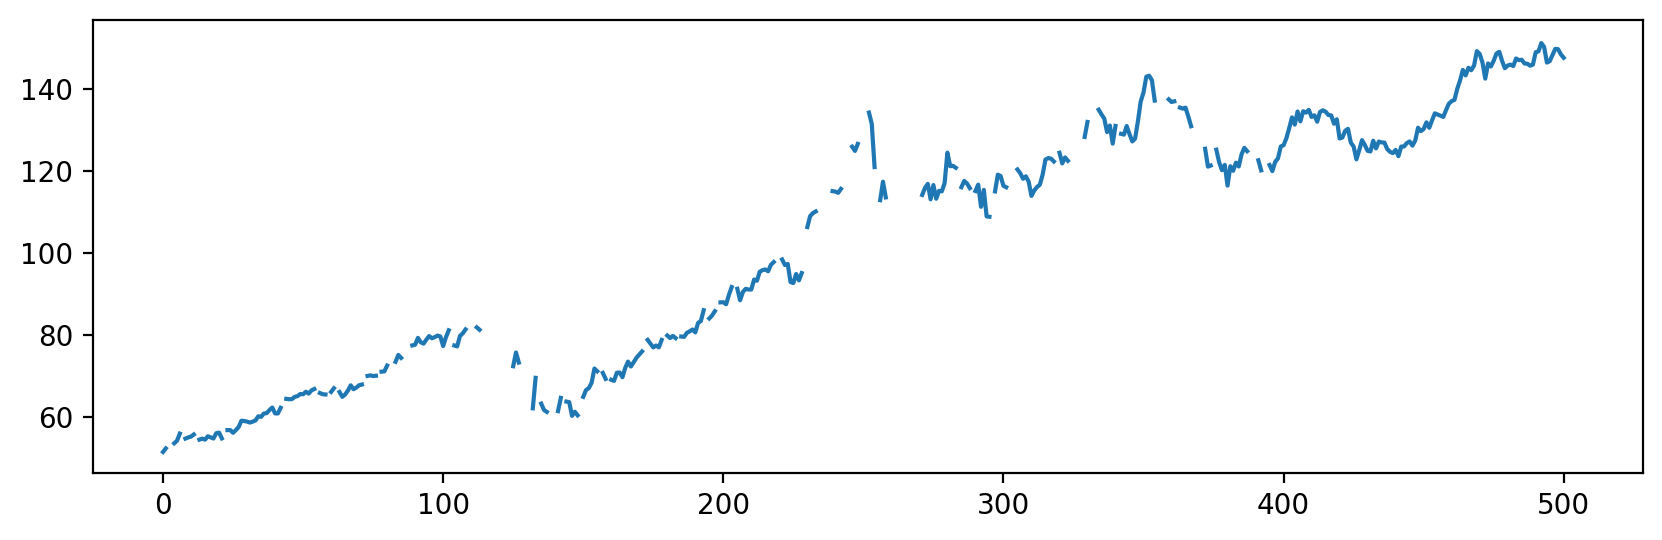

In [187]:
df["Close"].plot()

******  Zero fill approach:    *******
           Date        Open        High         Low       Close       Volume
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   80092000.0
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   76752400.0
2    2019-09-05    0.000000    0.000000    0.000000    0.000000          0.0
3    2019-09-06    0.000000    0.000000    0.000000    0.000000          0.0
4    2019-09-09   53.709999   54.110001   52.767502   53.542500  109237600.0
..          ...         ...         ...         ...         ...          ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001   58991300.0
500  2021-08-26  148.350006  149.119995  147.509995  147.539993   48597200.0
501  2021-08-27    0.000000    0.000000    0.000000    0.000000          0.0
502  2021-08-30    0.000000    0.000000    0.000000    0.000000          0.0
503  2021-08-31  152.660004  152.800003  151.289993  151.830002   86453100.0

[504 rows x 6 columns]


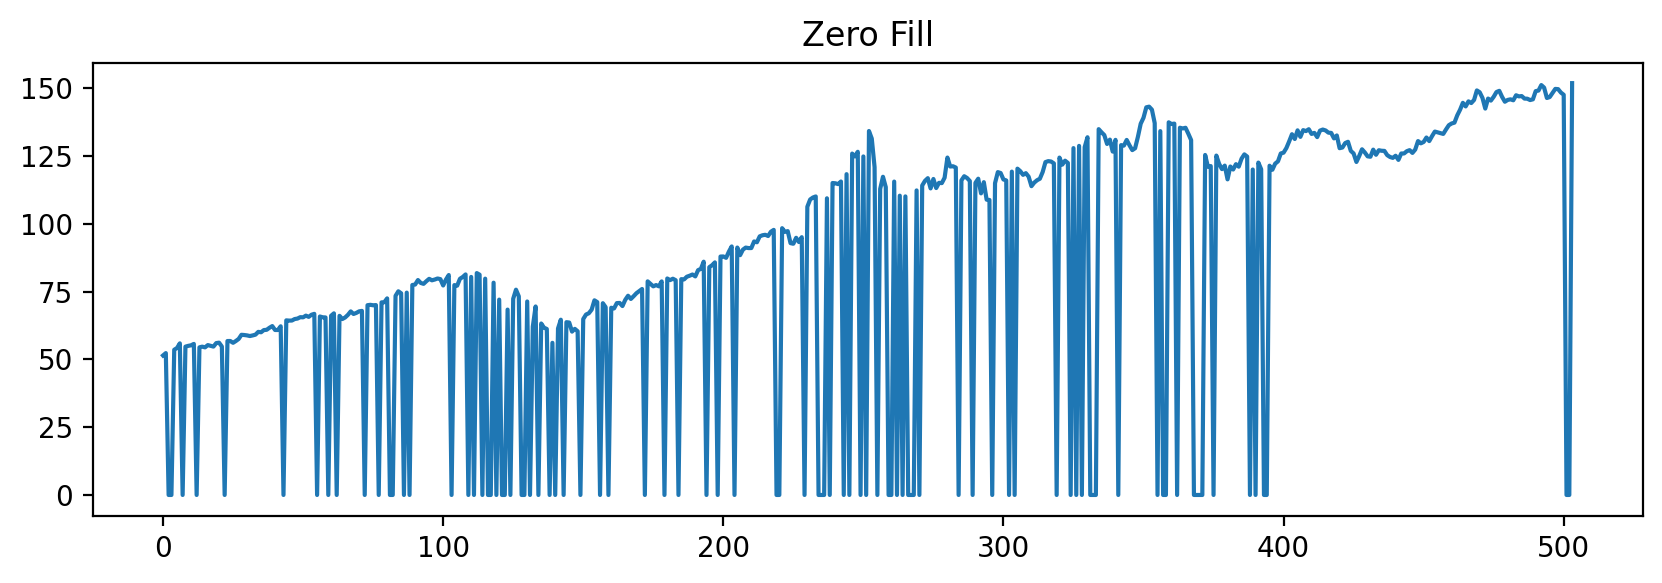

In [188]:
# zeros, 
print("******  Zero fill approach:    *******")
df_tmp = df.fillna(0)
print(df_tmp)  # replace all nans with 0
df_tmp["Close"].plot(title="Zero Fill")
plt.show()

******  Bfill approach:    *******
           Date        Open        High         Low       Close       Volume
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   80092000.0
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   76752400.0
2    2019-09-05   53.709999   54.110001   52.767502   53.542500  109237600.0
3    2019-09-06   53.709999   54.110001   52.767502   53.542500  109237600.0
4    2019-09-09   53.709999   54.110001   52.767502   53.542500  109237600.0
..          ...         ...         ...         ...         ...          ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001   58991300.0
500  2021-08-26  148.350006  149.119995  147.509995  147.539993   48597200.0
501  2021-08-27  152.660004  152.800003  151.289993  151.830002   86453100.0
502  2021-08-30  152.660004  152.800003  151.289993  151.830002   86453100.0
503  2021-08-31  152.660004  152.800003  151.289993  151.830002   86453100.0

[504 rows x 6 columns]


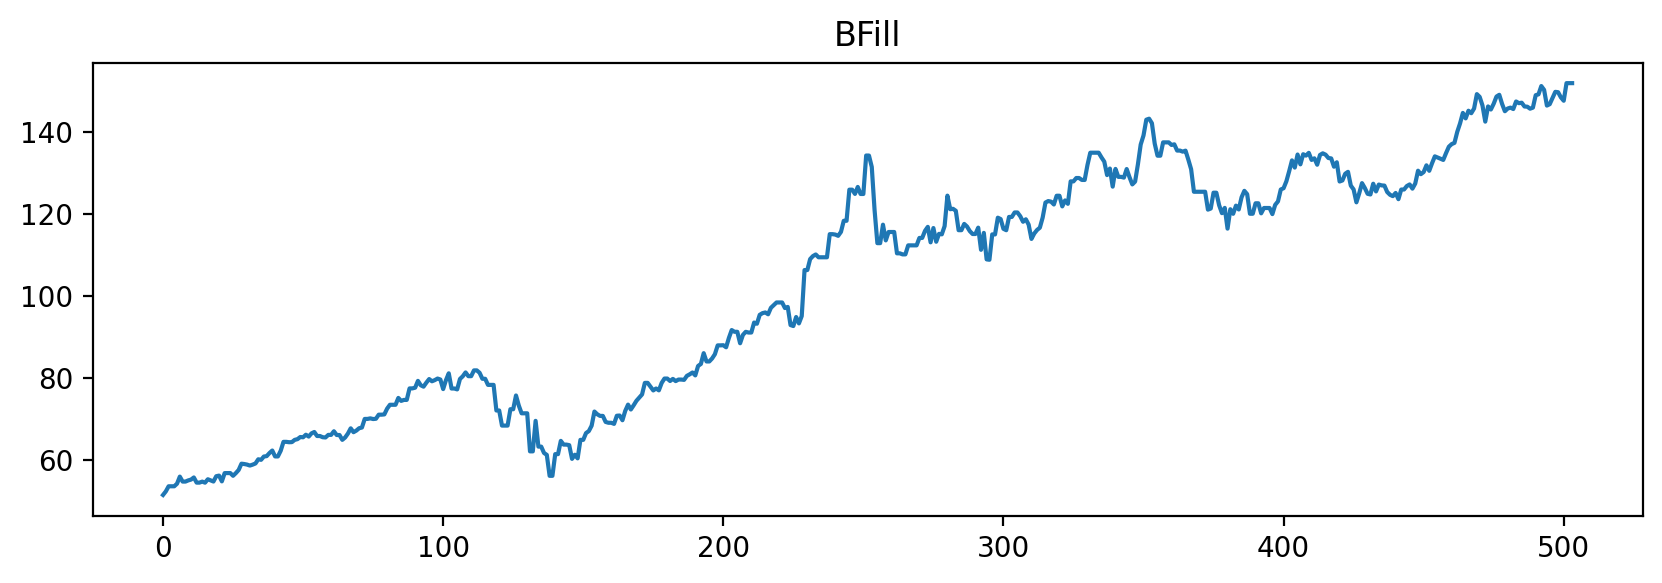

In [189]:
print("******  Bfill approach:    *******")
df_tmp = df.fillna(method="bfill") 
print(df_tmp)  # use next valid observation to fill gap.
df_tmp["Close"].plot(title="BFill")
plt.show()

******  Ffill approach:    *******
           Date        Open        High         Low       Close       Volume
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   80092000.0
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   76752400.0
2    2019-09-05   52.097500   52.369999   51.830002   52.297501   76752400.0
3    2019-09-06   52.097500   52.369999   51.830002   52.297501   76752400.0
4    2019-09-09   53.709999   54.110001   52.767502   53.542500  109237600.0
..          ...         ...         ...         ...         ...          ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001   58991300.0
500  2021-08-26  148.350006  149.119995  147.509995  147.539993   48597200.0
501  2021-08-27  148.350006  149.119995  147.509995  147.539993   48597200.0
502  2021-08-30  148.350006  149.119995  147.509995  147.539993   48597200.0
503  2021-08-31  152.660004  152.800003  151.289993  151.830002   86453100.0

[504 rows x 6 columns]


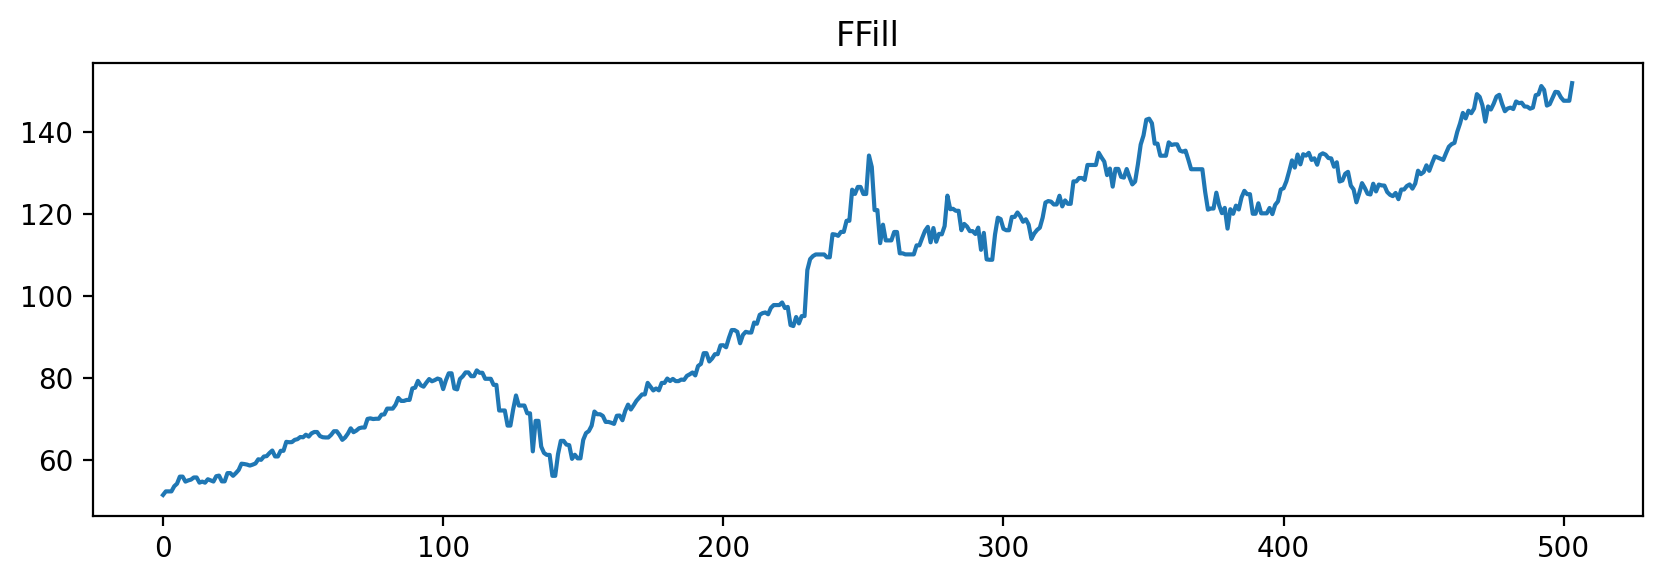

In [190]:
print("******  Ffill approach:    *******")
df_tmp = df.fillna(method="ffill") 
print(df_tmp)  # propagate last valid observation forward to next valid
df_tmp["Close"].plot(title="FFill")
plt.show()

In [191]:
# close will be the same, no trades --> no changes
df["Close"].fillna(method="ffill", inplace=True)
# volume will be zero, no trades --> no exchange volume 
df["Volume"].fillna(0, inplace=True)
# Open, High and Low will be as the close, as we don't have trades and changes in this candlestick
df["Open"].fillna(df["Close"], inplace=True)
df["High"].fillna(df["Close"], inplace=True)
df["Low"].fillna(df["Close"], inplace=True)

print(df)

           Date        Open        High         Low       Close       Volume
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   80092000.0
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   76752400.0
2    2019-09-05   52.297501   52.297501   52.297501   52.297501          0.0
3    2019-09-06   52.297501   52.297501   52.297501   52.297501          0.0
4    2019-09-09   53.709999   54.110001   52.767502   53.542500  109237600.0
..          ...         ...         ...         ...         ...          ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001   58991300.0
500  2021-08-26  148.350006  149.119995  147.509995  147.539993   48597200.0
501  2021-08-27  147.539993  147.539993  147.539993  147.539993          0.0
502  2021-08-30  147.539993  147.539993  147.539993  147.539993          0.0
503  2021-08-31  152.660004  152.800003  151.289993  151.830002   86453100.0

[504 rows x 6 columns]


<AxesSubplot:>

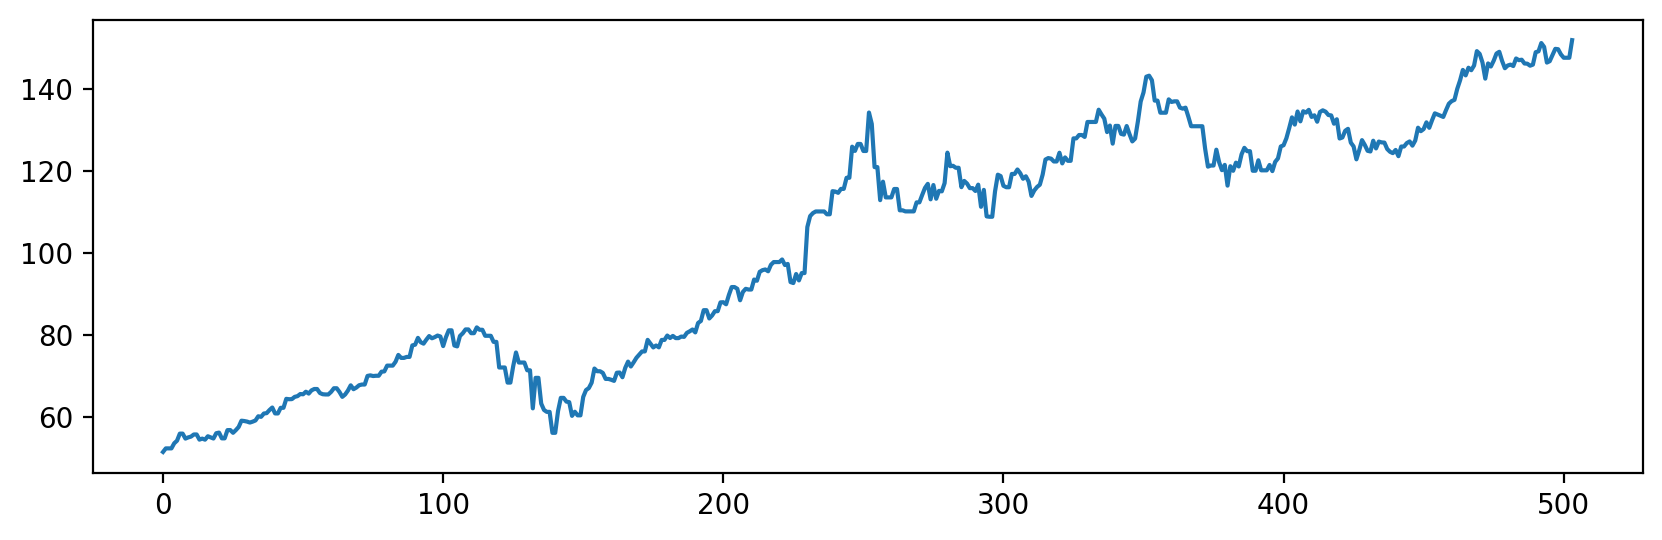

In [192]:
# plot close
df["Close"].plot()

### Technical Indicators

##### MACD
The **Moving Average Convergence Divergence** momentum indicator to identify buy or sell opportunities. It is based on the difference of a **short-term** and **long-term** price trend. MACD can be calculated very simply by subtracting the 26 period EMA from the 12 period **EMA**. The **MACD** chart commonly will include a signal line plotted on top of the MACD. Whenever the MACD crosses above the signal line it is a bullish signal, and a bearish signal when it falls below. 


##### EMA
The **EMA** is an **exponential moving average**, which is a sinmple moving average but it weights more recent data points. 

<img src="data/press_images/ema.png" width="800" height="1100"/>

A common choice for the **smoothing factor** is 2.


In [193]:
def calculate_ema(df, days, smoothing=2, column="Close"):
    data_col = df[column]
    # first let's compute the simple moving average for the first days
    ema = [np.mean(data_col[:days])]
    
    ema = [np.nan] * (days - 1) + ema 
    # iteratively compute the EMA for each subsequent day
    for price in data_col[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    
    return ema

In [194]:
df["EMA_10"] = calculate_ema(df, days=10)
print(df)

           Date        Open        High         Low       Close       Volume      EMA_10
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   80092000.0         NaN
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   76752400.0         NaN
2    2019-09-05   52.297501   52.297501   52.297501   52.297501          0.0         NaN
3    2019-09-06   52.297501   52.297501   52.297501   52.297501          0.0         NaN
4    2019-09-09   53.709999   54.110001   52.767502   53.542500  109237600.0         NaN
..          ...         ...         ...         ...         ...          ...         ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001   58991300.0  148.394040
500  2021-08-26  148.350006  149.119995  147.509995  147.539993   48597200.0  148.238759
501  2021-08-27  147.539993  147.539993  147.539993  147.539993          0.0  148.111711
502  2021-08-30  147.539993  147.539993  147.539993  147.539993          0.0  148.007762
503  2021-08-31  152.

<AxesSubplot:>

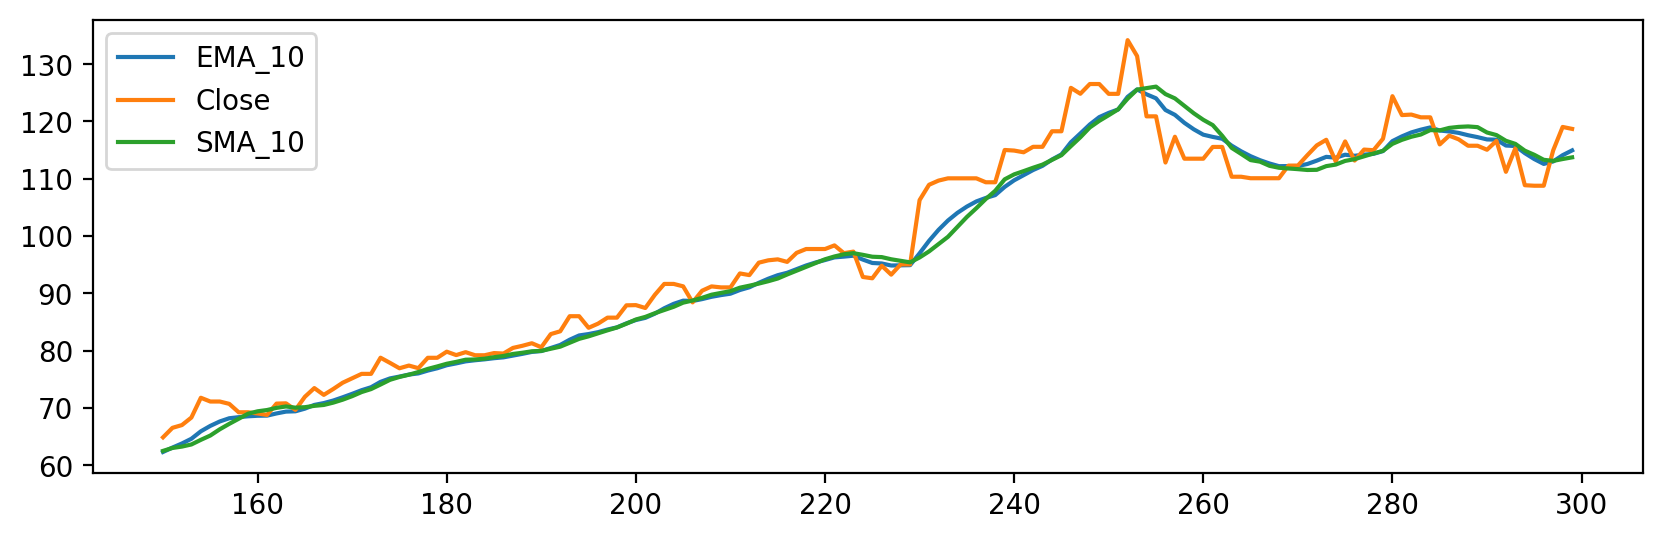

In [195]:
df["SMA_10"] = df["Close"].rolling(10).mean()
df[["EMA_10", "Close", "SMA_10"]][150:300].plot()

In [196]:
# faster way to compute EMA
df["EMA_10_new"] = df['Close'].ewm(span=10).mean()
print(df[["EMA_10_new", "EMA_10"]])

     EMA_10_new      EMA_10
0     51.424999         NaN
1     51.904875         NaN
2     52.062708         NaN
3     52.140062         NaN
4     52.542664         NaN
..          ...         ...
499  148.394040  148.394040
500  148.238759  148.238759
501  148.111711  148.111711
502  148.007762  148.007762
503  148.702715  148.702715

[504 rows x 2 columns]


##### MACD

MACD(12,26,9) is referred to:
<br>
MACD = 12-Period EMA − 26-Period EMA
<br>
Signal line = 9-Period SMA of MACD


In [197]:
def macd(df):
    df["EMA_12"] = df['Close'].ewm(span=12).mean()
    df["EMA_26"] = df['Close'].ewm(span=26).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal Line'] = df['MACD'].ewm(span=9).mean()


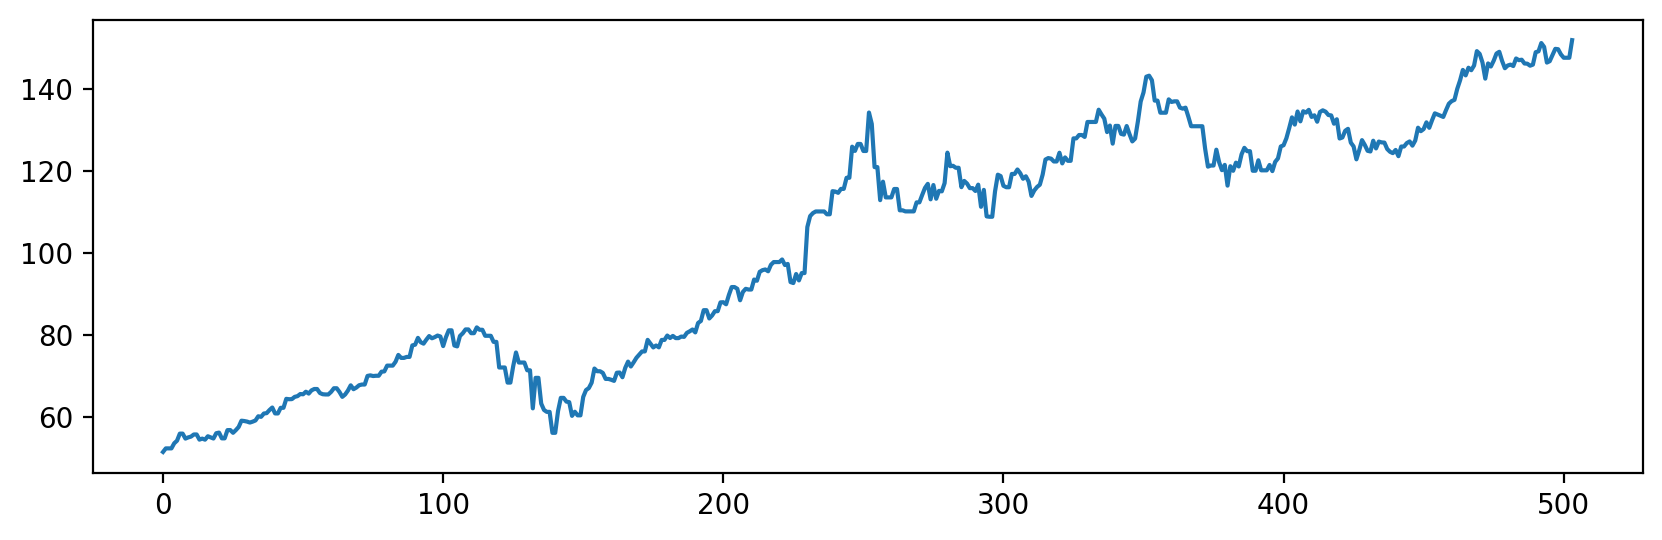

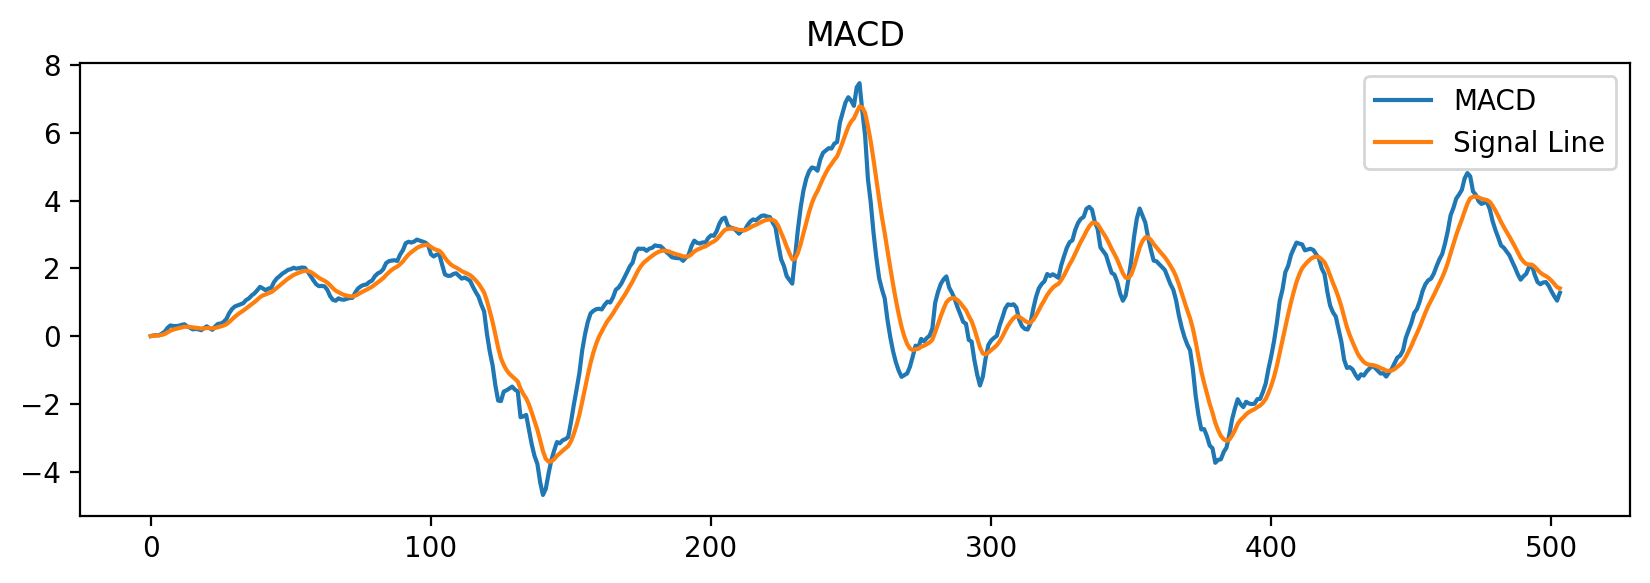

In [198]:
signal_df = df[["Close"]]
macd(signal_df)
df["Close"].plot()
plt.show()
signal_df[['MACD', "Signal Line"]].plot(title="MACD")
plt.show()

Whenever MACD crosses above the signal line it is a bullish signal, and a bearish signal when it falls below. 

#### RSI
The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes, to evaluate overbought or oversold conditions in the price of a stock or other asset.
In details, it describes the current price relative to average high and low prices over a previous trading period.

<br>
It uses a standardization formula to ensure all values are placed on a scale of 0-100. An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.

<br>
<br>

It is computed using the Relative Strength (RS) of the current market, which considers the average gain or loss used in the calculation is the average percentage gain or loss during a look-back period. Usually a period of 14 days is used. 


<img src="data/press_images/rsi-formulae-alpharithms.jpg" width="600" height="800"/>

In [199]:
df["Diff"] = df['Close'].diff()  # gain and loss for each day, daily return 
df["Gain"] = np.where(df["Diff"] > 0, df["Diff"], 0)  # save all the days with a gain and its value
df["Loss"] = np.where(df["Diff"] < 0, -df["Diff"], 0)  # save all the days with a loss and its positive value

df[["Close", "Diff", "Gain", "Loss"]][30:50]

Close      Diff      Gain      Loss
30  58.830002 -0.137497  0.000000  0.137497
31  58.592499 -0.237503  0.000000  0.237503
32  58.820000  0.227501  0.227501  0.000000
33  59.102501  0.282501  0.282501  0.000000
34  60.127499  1.024998  1.024998  0.000000
35  59.990002 -0.137497  0.000000  0.137497
36  60.794998  0.804996  0.804996  0.000000
37  60.895000  0.100002  0.100002  0.000000
38  61.645000  0.750000  0.750000  0.000000
39  62.262501  0.617501  0.617501  0.000000
40  60.822498 -1.440003  0.000000  1.440003
41  60.814999 -0.007499  0.000000  0.007499
42  62.189999  1.375000  1.375000  0.000000
43  62.189999  0.000000  0.000000  0.000000
44  64.375000  2.185001  2.185001  0.000000
45  64.282501 -0.092499  0.000000  0.092499
46  64.309998  0.027497  0.027497  0.000000
47  64.857498  0.547500  0.547500  0.000000
48  65.035004  0.177506  0.177506  0.000000
49  65.550003  0.514999  0.514999  0.000000

In [200]:
# now compute the average of these loss and gain in the past
days = 14
df['Avg_gain'] = df['Gain'].rolling(days).mean() # rolling mean 14 of gains
df['Avg_loss'] = df['Loss'].rolling(days).mean() # //

# compute the RS
df["RS"] = df["Avg_gain"] / df["Avg_loss"]

# compute the RSI
df['RSI'] = 100 - (100/(1+df['RS']))

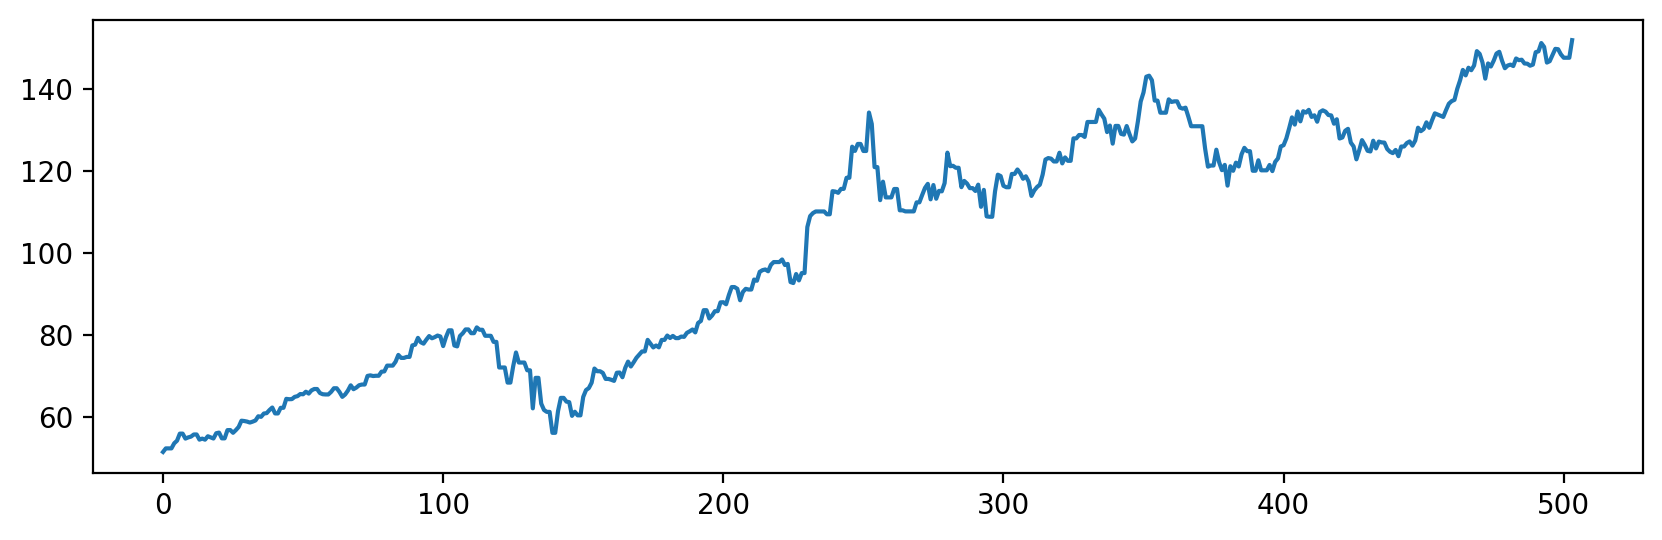

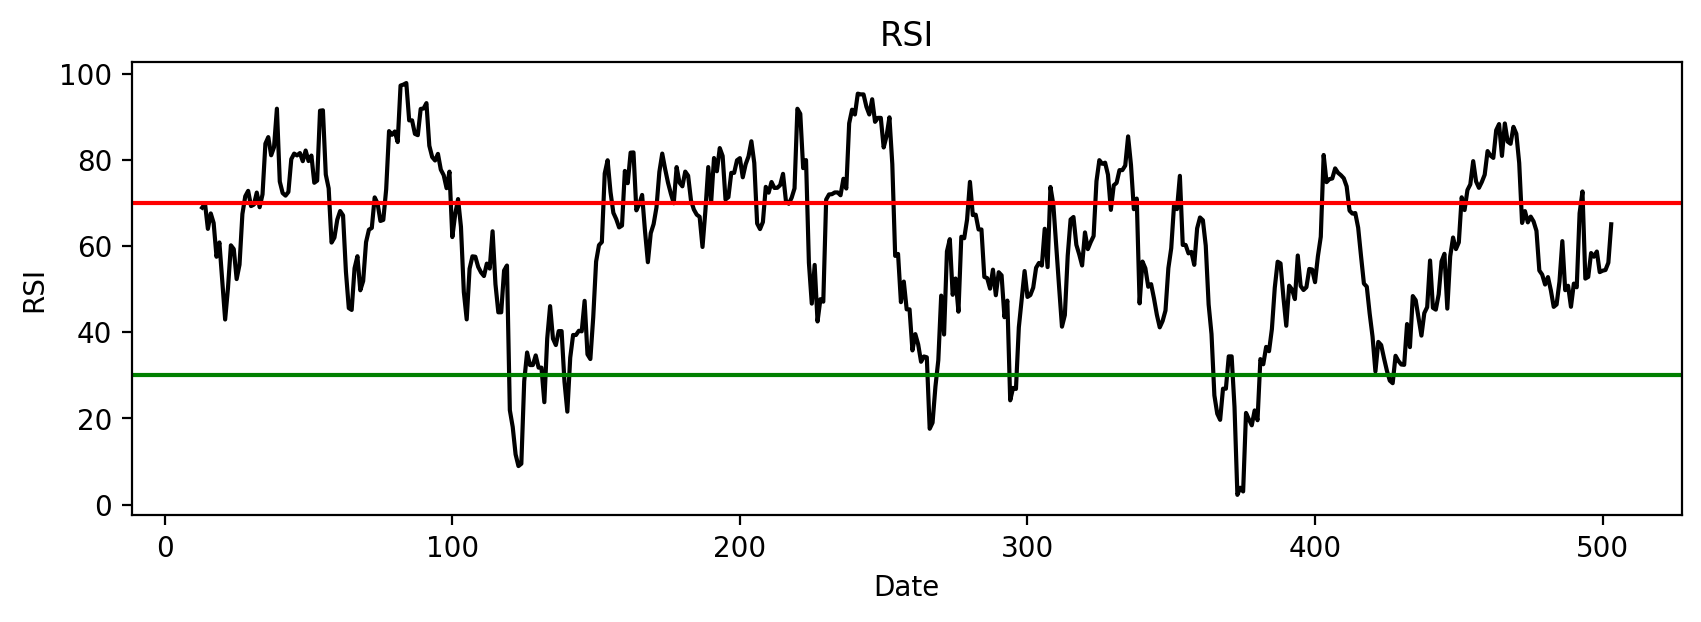

In [201]:
df["Close"].plot()
plt.show()
plt.figure(2)
ax = df['RSI'].plot(title="RSI", color="black")
ax.set_xlabel("Date")
ax.set_ylabel("RSI")
plt.axhline(y=30,color='green')
plt.axhline(y=70,color='red')

#### Python libraries to compute indicators

Pandas_ta - https://pypi.org/project/pandas-ta/

<AxesSubplot:>

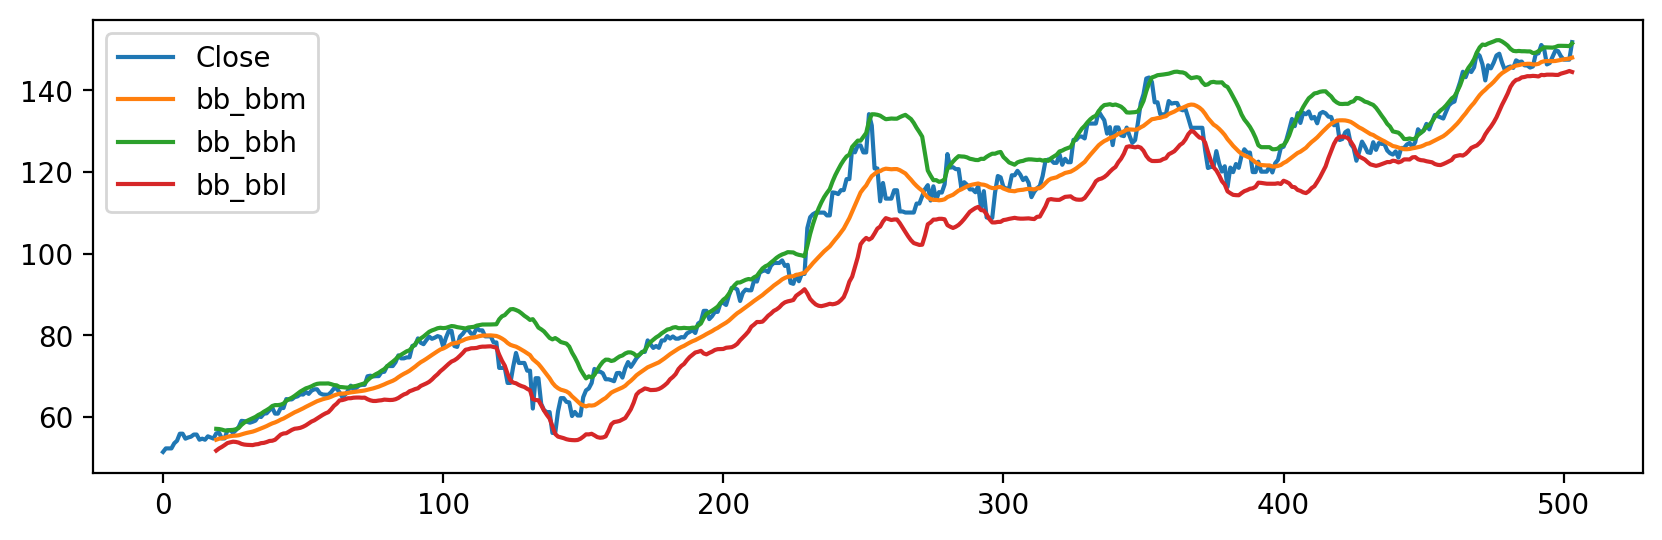

In [204]:

from ta.utils import dropna
from ta.volatility import BollingerBands

# Initialize Bollinger Bands Indicator
df = df[["Close"]]
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

df.plot()

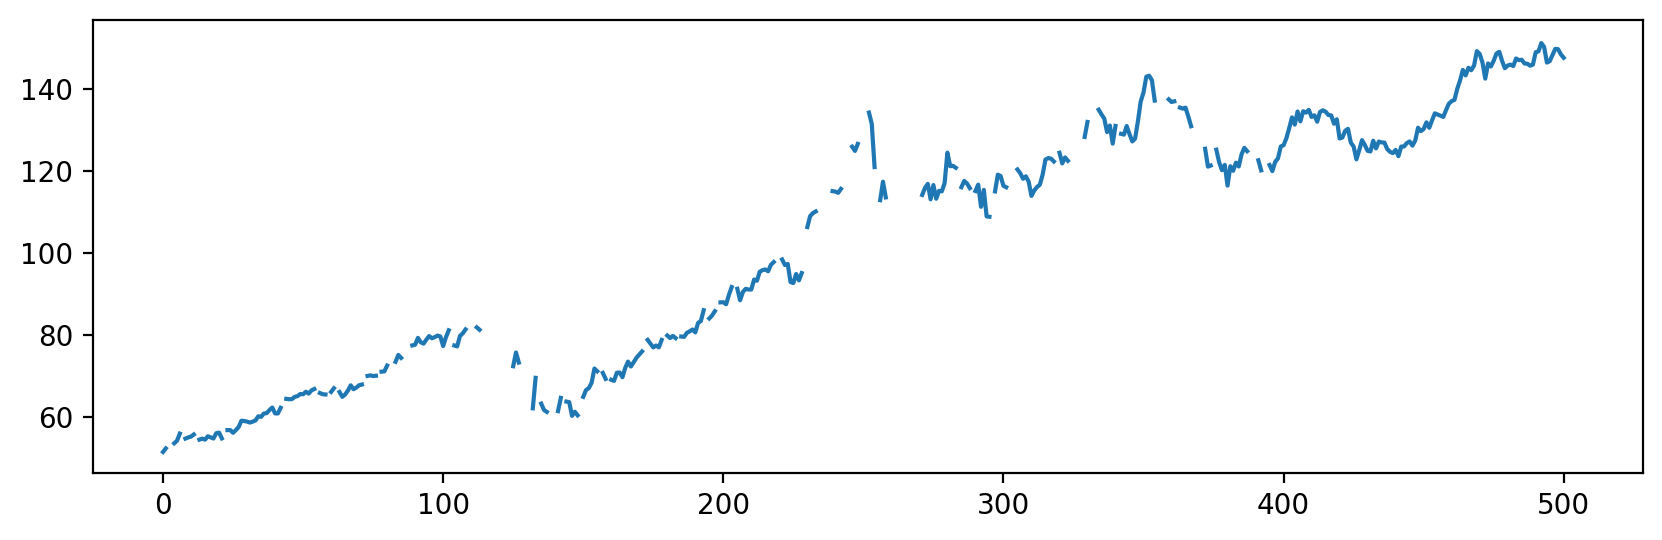

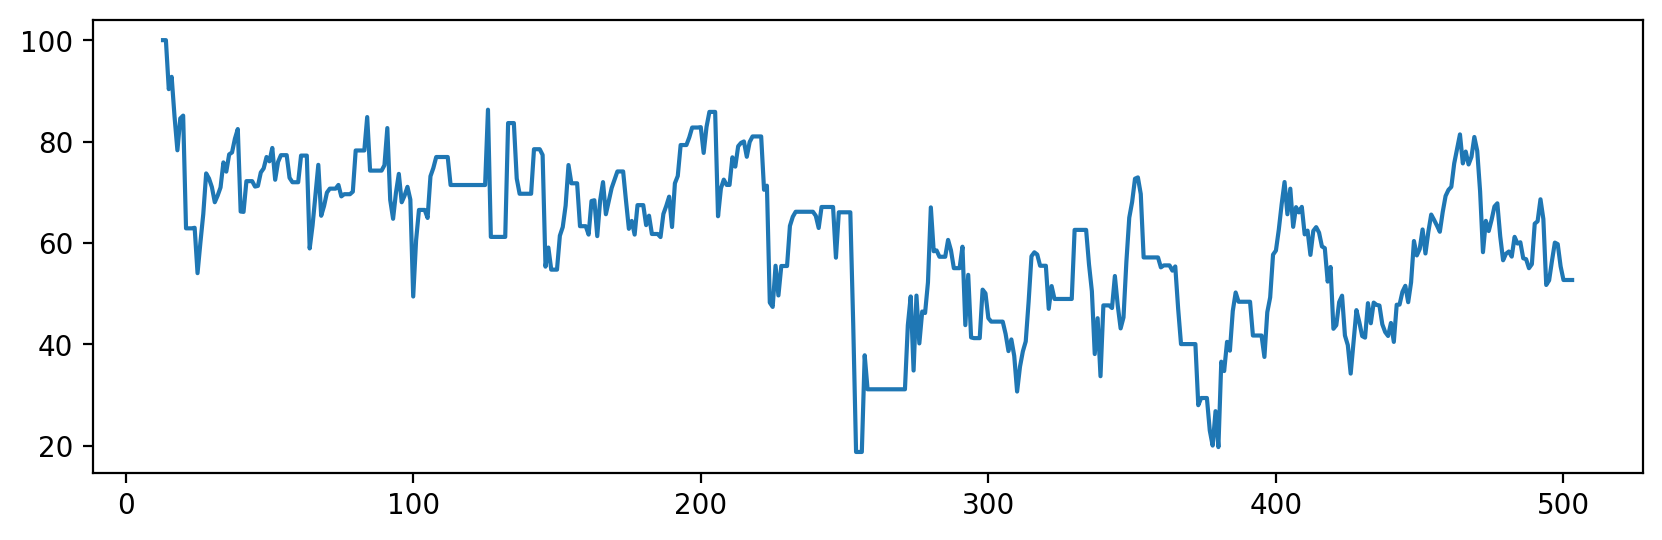

In [220]:
from ta.momentum import rsi

# Initialize Bollinger Bands Indicator
df = df[["Close"]]
rsi = rsi(close=df["Close"])
df["RSI"] = rsi

df["Close"].plot()
plt.show()
df["RSI"].plot()
plt.show()

## Others tecnical indicators:
1 - Moving average (MA)
<br>
2 - Exponential moving average (EMA)
<br>
3 - Moving average convergence divergence (MACD)
<br>
4 - Bollinger bands
<br>
5 - Relative strength index (RSI)
<br>
6 - Fibonacci retracement
<br>
7 - Ichimoku cloud
<br>
8 - Standard deviation
<br>
9 - Average directional index


## Useful Python libraries:
- Tulipy for indicators  - https://github.com/cirla/tulipy 
<br>
- zipline – Pythonic algorithmic trading library - https://pypi.org/project/zipline/
<br>
- yahoo-finance – Python module to get stock data from Yahoo! Finance. https://github.com/lukaszbanasiak/yahoo-finance
<br>
- trading_calendars – Stock Exchange Trading Calendars.  https://github.com/quantopian/trading_calendars
